In [ ]:
%pip install -q dagshub 'mlflow>=2,<3'


In [ ]:
import dagshub
dagshub.init(repo_owner='Zerol-91', repo_name='Stress-Level-ML-Researching', mlflow=True)

In [4]:
import numpy as np
import pandas as pd


In [ ]:
from google.colab import files
uploaded = files.upload()

In [7]:
my_data=pd.read_csv("Anxiety_Level_Test_2.csv")

In [ ]:
my_data.head()

In [ ]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 25 columns):
 #   Column                                                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                                                       --------------  -----  
 0   Отметка времени                                                                                                                              439 non-null    object 
 1   По Вашему *субъективному мнению*, как Вы оцените свой уровень тревожности от 1 до 10 баллов                                                  439 non-null    int64  
 2   За последние 2 недели, как часто Вы были нервны, тревожны или «на взводе»?                                                                   439 non-null    object 
 3   За последние 2 недели, как часто Вы не м

In [ ]:
my_data.describe()

,"По Вашему *субъективному мнению*, как Вы оцените свой уровень тревожности от 1 до 10 баллов",Сколько часов сна Вы в среднем получаете за ночь (последняя неделя)?,Физическая активность/Занятие спортом (в среднем часов за неделю),Качество вашего питания (самооценка),Сколько часов в среднем в день вы проводите в телефоне (не считая работы/учёбы)?,Ваш возраст (лет)
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,5.223235,6.717449,4.731891,5.890661,4.989749,19.463933
std,2.406291,1.299060,4.214601,1.770349,3.097614,5.260620
min,1.000000,3.000000,0.000000,1.000000,0.000000,16.000000
25%,4.000000,6.000000,2.000000,5.000000,3.000000,18.000000
50%,5.000000,7.000000,4.000000,6.000000,4.000000,18.000000
75%,7.000000,7.000000,6.000000,7.000000,6.000000,19.000000
max,10.000000,14.000000,21.000000,10.000000,16.000000,72.387574


Закодируем колонки.

In [ ]:
my_data['За последние 2 недели, как часто Вы были нервны, тревожны или «на взводе»?']=\
    my_data['За последние 2 недели, как часто Вы были нервны, тревожны или «на взводе»?'].\
    replace({'Ни разу':0,'Несколько дней':1,'Более половины дней':2,'Почти каждый день':3})

my_data['За последние 2 недели, как часто Вы не могли остановить или контролировать беспокойство?']=\
    my_data['За последние 2 недели, как часто Вы не могли остановить или контролировать беспокойство?'].\
    replace({'Ни разу':0,'Несколько дней':1,'Более половины дней':2,'Почти каждый день':3})

my_data['За последние 2 недели, как часто Вы чрезмерно беспокоились по разным поводам?']=\
    my_data['За последние 2 недели, как часто Вы чрезмерно беспокоились по разным поводам?'].\
    replace({'Ни разу':0,'Несколько дней':1,'Более половины дней':2,'Почти каждый день':3})

my_data['За последние 2 недели, как часто Вам было трудно расслабиться?']=\
    my_data['За последние 2 недели, как часто Вам было трудно расслабиться?'].\
    replace({'Ни разу':0,'Несколько дней':1,'Более половины дней':2,'Почти каждый день':3})

my_data['За последние 2 недели, как часто Вы были настолько беспокойны, что Вам было трудно сидеть на месте?']=\
    my_data['За последние 2 недели, как часто Вы были настолько беспокойны, что Вам было трудно сидеть на месте?'].\
    replace({'Ни разу':0,'Несколько дней':1,'Более половины дней':2,'Почти каждый день':3})

my_data['За последние 2 недели, как часто Вы были раздражительны?']=\
    my_data['За последние 2 недели, как часто Вы были раздражительны?'].\
    replace({'Ни разу':0,'Несколько дней':1,'Более половины дней':2,'Почти каждый день':3})

my_data['За последние 2 недели, как часто Вы испытывали страх, будто может случиться что-то плохое?']=\
    my_data['За последние 2 недели, как часто Вы испытывали страх, будто может случиться что-то плохое?'].\
    replace({'Ни разу':0,'Несколько дней':1,'Более половины дней':2,'Почти каждый день':3})

Посчитаем переменную для предсказания.

In [9]:
my_data['Anxiety_Level']=my_data[['За последние 2 недели, как часто Вы были нервны, тревожны или «на взводе»?',\
                                  'За последние 2 недели, как часто Вы не могли остановить или контролировать беспокойство?',\
                                  'За последние 2 недели, как часто Вы чрезмерно беспокоились по разным поводам?',\
                                  'За последние 2 недели, как часто Вам было трудно расслабиться?',\
                                  'За последние 2 недели, как часто Вы были настолько беспокойны, что Вам было трудно сидеть на месте?',\
                                  'За последние 2 недели, как часто Вы были раздражительны?',\
                                  'За последние 2 недели, как часто Вы испытывали страх, будто может случиться что-то плохое?']].sum(axis=1)

Закодируем оставшиеся признаки для обучения

In [ ]:
my_data['Как часто Вы употребляете алкоголь?']=\
    my_data['Как часто Вы употребляете алкоголь?'].\
    replace({'Никогда':0,'Реже одного раза в месяц':1,'1-3 раза в месяц':2,'1-2 раза в неделю':3,\
             '3-4 раза в неделю':4,'Почти ежедневно':5})

my_data['Как Вы опишете свой статус курения?']=\
    my_data['Как Вы опишете свой статус курения?'].\
    replace({'Не курю':0,'Иногда курю':1,'Ежедневно курю':2})

my_data['Сколько раз Вы посещали психолога/психотерапевта за последний месяц?']=\
    my_data['Сколько раз Вы посещали психолога/психотерапевта за последний месяц?'].\
    replace({'3 и больше':3})

my_data['Сколько раз Вы посещали психолога/психотерапевта за последний месяц?']=\
my_data['Сколько раз Вы посещали психолога/психотерапевта за последний месяц?'].astype(float)

my_data['Принимаете ли Вы сейчас лекарства от тревоги/депрессии или другое психотропное лечение?']=\
    my_data['Принимаете ли Вы сейчас лекарства от тревоги/депрессии или другое психотропное лечение?'].\
    replace({'Нет':0,'Да':1})

my_data['Как часто Вы выходите на прогулку/на свежий воздух?']=\
    my_data['Как часто Вы выходите на прогулку/на свежий воздух?'].\
    replace({'Никогда':0,'Не более 3 раз в месяц':1,'Раз в неделю':2,'Несколько раз в неделю':3,\
             'Почти каждый день':4})

my_data['Насколько Вы удовлетворены уровнем вашего общения с друзьями, коллегами и знакомыми?']=\
    my_data['Насколько Вы удовлетворены уровнем вашего общения с друзьями, коллегами и знакомыми?'].\
    replace({'Совершенно не удовлетворён(а)':0,'Скорее не удовлетворён(а)':1,'Нейтрально':2,'Скорее удовлетворён(а)':3,\
             'Полностью удовлетворён(а)':4})

my_data['Насколько Вы удовлетворены собственной текущей рабочей/учебной средой (коллеги, учебный коллектив, условия)?']=\
    my_data['Насколько Вы удовлетворены собственной текущей рабочей/учебной средой (коллеги, учебный коллектив, условия)?'].\
    replace({'Совершенно не удовлетворён(а)':0,'Скорее не удовлетворён(а)':1,'Нейтрально':2,'Скорее удовлетворён(а)':3,\
             'Полностью удовлетворён(а)':4})

my_data['Какой режим Вам больше подходит?']=\
    my_data['Какой режим Вам больше подходит?'].\
    replace({'Жаворонок — мне удобнее вставать рано и ложиться рано':0,\
             'Нейтрально — нет яркого предпочтения':1,'Сова — мне удобнее ложиться поздно и вставать поздно':2})

my_data['Насколько Вы чувствуете поддержку со стороны близких (друзей/семьи)?']=\
    my_data['Насколько Вы чувствуете поддержку со стороны близких (друзей/семьи)?'].\
    replace({'Никогда':0,'Редко':1,'Иногда':2,'Часто':3,\
             'Всегда':4})

my_data['Произошло ли в вашей жизни за последний год значимое негативное событие (потеря работы, развод, смерть близкого, серьёзная болезнь и т.п.)?']=\
    my_data['Произошло ли в вашей жизни за последний год значимое негативное событие (потеря работы, развод, смерть близкого, серьёзная болезнь и т.п.)?'].\
    replace({'Нет':0,'Да':1})

my_data['Ваш пол']=\
    my_data['Ваш пол'].\
    replace({'Мужской':0,'Предпочитаю не говорить':0.5,'Женский':1})

In [ ]:
my_data.head()

,Отметка времени,"По Вашему *субъективному мнению*, как Вы оцените свой уровень тревожности от 1 до 10 баллов","За последние 2 недели, как часто Вы были нервны, тревожны или «на взводе»?","За последние 2 недели, как часто Вы не могли остановить или контролировать беспокойство?","За последние 2 недели, как часто Вы чрезмерно беспокоились по разным поводам?","За последние 2 недели, как часто Вам было трудно расслабиться?","За последние 2 недели, как часто Вы были настолько беспокойны, что Вам было трудно сидеть на месте?","За последние 2 недели, как часто Вы были раздражительны?","За последние 2 недели, как часто Вы испытывали страх, будто может случиться что-то плохое?",Сколько часов сна Вы в среднем получаете за ночь (последняя неделя)?,...,Как часто Вы выходите на прогулку/на свежий воздух?,"Насколько Вы удовлетворены уровнем вашего общения с друзьями, коллегами и знакомыми?","Насколько Вы удовлетворены собственной текущей рабочей/учебной средой (коллеги, учебный коллектив, условия)?",Какой режим Вам больше подходит?,Насколько Вы чувствуете поддержку со стороны близких (друзей/семьи)?,Сколько часов в среднем в день вы проводите в телефоне (не считая работы/учёбы)?,"Произошло ли в вашей жизни за последний год значимое негативное событие (потеря работы, развод, смерть близкого, серьёзная болезнь и т.п.)?",Ваш пол,Ваш возраст (лет),Anxiety_Level
0,06.10.2025 18:07:59,2,0,1,0,3,1,1,0,7.5,...,2,4,4,0,4,4.0,0,0.0,18.0,6
1,06.10.2025 18:11:32,7,2,1,1,3,2,2,0,4.0,...,1,4,3,2,4,4.0,0,0.0,19.0,11
2,06.10.2025 19:01:23,2,0,0,0,0,0,0,0,7.0,...,4,4,4,1,3,6.0,0,0.0,18.0,0
3,06.10.2025 19:05:01,4,0,0,2,2,1,1,1,7.5,...,1,3,2,1,2,1.5,1,0.0,18.0,7
4,07.10.2025 12:07:40,4,0,0,0,1,0,2,1,5.0,...,3,4,3,1,4,1.0,0,0.0,18.0,4


In [ ]:
my_data.describe()

,"По Вашему *субъективному мнению*, как Вы оцените свой уровень тревожности от 1 до 10 баллов","За последние 2 недели, как часто Вы были нервны, тревожны или «на взводе»?","За последние 2 недели, как часто Вы не могли остановить или контролировать беспокойство?","За последние 2 недели, как часто Вы чрезмерно беспокоились по разным поводам?","За последние 2 недели, как часто Вам было трудно расслабиться?","За последние 2 недели, как часто Вы были настолько беспокойны, что Вам было трудно сидеть на месте?","За последние 2 недели, как часто Вы были раздражительны?","За последние 2 недели, как часто Вы испытывали страх, будто может случиться что-то плохое?",Сколько часов сна Вы в среднем получаете за ночь (последняя неделя)?,Физическая активность/Занятие спортом (в среднем часов за неделю),...,Как часто Вы выходите на прогулку/на свежий воздух?,"Насколько Вы удовлетворены уровнем вашего общения с друзьями, коллегами и знакомыми?","Насколько Вы удовлетворены собственной текущей рабочей/учебной средой (коллеги, учебный коллектив, условия)?",Какой режим Вам больше подходит?,Насколько Вы чувствуете поддержку со стороны близких (друзей/семьи)?,Сколько часов в среднем в день вы проводите в телефоне (не считая работы/учёбы)?,"Произошло ли в вашей жизни за последний год значимое негативное событие (потеря работы, развод, смерть близкого, серьёзная болезнь и т.п.)?",Ваш пол,Ваш возраст (лет),Anxiety_Level
count,439.000000,439.000000,439.000000,439.00000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,...,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,5.223235,1.175399,0.719818,1.09795,1.097950,0.608200,1.029613,0.792711,6.717449,4.731891,...,2.599089,2.888383,2.482916,1.280182,3.025057,4.989749,0.293850,0.519362,19.463933,6.521640
std,2.406291,0.835150,0.808823,0.90001,0.920081,0.839399,0.783120,0.838754,1.299060,4.214601,...,1.158096,1.039769,1.028833,0.712795,0.958886,3.097614,0.456044,0.489817,5.260620,4.660517
min,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000
25%,4.000000,1.000000,0.000000,0.50000,0.000000,0.000000,1.000000,0.000000,6.000000,2.000000,...,2.000000,2.000000,2.000000,1.000000,3.000000,3.000000,0.000000,0.000000,18.000000,3.000000
50%,5.000000,1.000000,1.000000,1.00000,1.000000,0.000000,1.000000,1.000000,7.000000,4.000000,...,3.000000,3.000000,3.000000,1.000000,3.000000,4.000000,0.000000,0.500000,18.000000,6.000000
75%,7.000000,2.000000,1.000000,1.00000,2.000000,1.000000,1.000000,1.000000,7.000000,6.000000,...,4.000000,4.000000,3.000000,2.000000,4.000000,6.000000,1.000000,1.000000,19.000000,9.000000
max,10.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,14.000000,21.000000,...,4.000000,4.000000,4.000000,2.000000,4.000000,16.000000,1.000000,1.000000,72.387574,21.000000


Наблюдения все теперь int и float, теперь можно разделять данные на тестовую и тренировочную выборки.


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X=my_data.drop(['Отметка времени','По Вашему *субъективному мнению*, как Вы оцените свой уровень тревожности от 1 до 10 баллов',\
                 'За последние 2 недели, как часто Вы были нервны, тревожны или «на взводе»?',\
                 'За последние 2 недели, как часто Вы не могли остановить или контролировать беспокойство?',\
                 'За последние 2 недели, как часто Вы чрезмерно беспокоились по разным поводам?',\
                 'За последние 2 недели, как часто Вам было трудно расслабиться?',\
                 'За последние 2 недели, как часто Вы были настолько беспокойны, что Вам было трудно сидеть на месте?',\
                 'За последние 2 недели, как часто Вы были раздражительны?',\
                 'За последние 2 недели, как часто Вы испытывали страх, будто может случиться что-то плохое?',\
                 'Anxiety_Level'],axis=1)

In [13]:
y=my_data['Anxiety_Level']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.225,      # 22.5% данных пойдут в тест
    random_state=42,    # для воспроизводимости
    shuffle=True        # перемешать данные перед разбиением
)

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf_regr=RandomForestRegressor(random_state=42 )

Функции для визуализации качества моделей

In [16]:
# Создание Диаграммы рассеивания
import matplotlib.pyplot as plt
import seaborn as sns

def scatter_plot(y_true,Y_predict):
  fig, ax = plt.subplots(figsize=(6,6))
  sns.scatterplot(x=y_true, y=Y_predict, alpha=0.5, ax=ax)
  sns.scatterplot(x=y_true, y=Y_predict, alpha=0.5, ax=ax)
  min_v = min(min(y_true), min(Y_predict))
  max_v = max(max(y_true), max(Y_predict))
  ax.plot([min_v, max_v], [min_v, max_v], color='red', linestyle='--')
  ax.set_xlabel('True GAD-7')
  ax.set_ylabel('Predicted')
  ax.set_title('True Vs Predicted')
  fig.tight_layout()
  plt.close(fig)  # чтобы в ноутбуке фигура не отобразилась автоматически
  return fig

In [17]:
# Создание Графика остатков от прогноза
def residual_plot(y_true, Y_predict):

    residuals = y_true - Y_predict

    fig, ax = plt.subplots(figsize=(7,5))

    sns.scatterplot(x=Y_predict, y=residuals, ax=ax, alpha=0.6, s=30, edgecolor="none")
    ax.axhline(0, color="red", linestyle="--", linewidth=1)

    sns.regplot(x=Y_predict, y=residuals, ax=ax, scatter=False, lowess=True, color="black",
                    line_kws={"lw":1, "alpha":0.7})

    ax.set_xlabel("Predicted")
    ax.set_ylabel("Residual (y_true - y_pred)")
    ax.set_title("Residuals vs Predicted")
    ax.grid(alpha=0.25)
    fig.tight_layout()
    return fig

In [18]:
# Распределение остатков
def residuals_distribution(y_true, Y_predict):

    residuals = y_true - Y_predict

    fig, ax = plt.subplots(figsize=(7,5))
    sns.histplot(residuals, bins=40, kde=True, stat="density", ax=ax, alpha=0.7, edgecolor="none")
    mean = residuals.mean()
    median = np.median(residuals)
    ax.axvline(mean, color="black", linestyle="--", linewidth=1, label=f"mean={mean:.3f}")
    ax.axvline(median, color="grey", linestyle=":", linewidth=1, label=f"median={median:.3f}")
    ax.set_xlabel("Residual (y_true - y_pred)")
    ax.set_ylabel("Density")
    ax.set_title("Distribution of Residuals")
    ax.legend(frameon=False)
    ax.grid(alpha=0.2)
    fig.tight_layout()
    return fig

In [19]:
def errors_boxplot(y_true, Y_predict):


    residuals = y_true - Y_predict

    fig, ax = plt.subplots(figsize=(6,4))
    sns.boxplot(x=residuals, ax=ax, orient="h", width=0.4, fliersize=4)

    mean = residuals.mean()
    median = np.median(residuals)
    ax.scatter(mean, 0, color="black", marker="D", s=30, label=f"mean={mean:.3f}")
    ax.axvline(median, color="grey", linestyle="--", linewidth=1, label=f"median={median:.3f}")
    ax.set_xlabel("Residual (y_true - y_pred)")
    # ax.set_yticks([])  # скрыть фактические метки по вертикали
    ax.set_title("Boxplot of Residuals")
    ax.legend(frameon=False, loc="upper right")
    ax.grid(axis="x", alpha=0.2)
    fig.tight_layout()
    return fig

In [20]:
import textwrap

def plot_feature_importance(model):
  wrapped_names = [textwrap.fill(name, width=30) for name in X.columns]

  imp = pd.DataFrame(model.feature_importances_, index=wrapped_names, columns=['importance'])

  ax=imp.sort_values('importance').plot(kind='barh', figsize=(12, 12))
  plt.yticks(fontsize=5.5)
  fig = ax.get_figure()

  return fig


In [21]:
def runSearch(params: dict):
  grid_search=GridSearchCV(
    rf_regr,
    params,
    cv=3,
    n_jobs=-1,
    verbose=3
  )
  grid_search.fit(X_train,y_train)
  return([grid_search.best_estimator_,grid_search.best_params_])

Модель 1: Лес решений

In [ ]:
#1-й прогон
my_params = {
    'n_estimators': np.arange(60,181,30),
    'max_depth': np.arange(1,14,2),
    'min_samples_split': np.arange(2, 9,3),
    'min_samples_leaf': np.arange(1, 6,3)
}
# runSearch(my_params)

# #Лучшие параметры 1-го прогона
#  {'max_depth': np.int64(7),
#   'min_samples_leaf': np.int64(4),
#   'min_samples_split': np.int64(8),
#   'n_estimators': np.int64(180)}]

#2-й прогон
my_params = {
    'n_estimators': np.arange(165,196,15),
    'max_depth': np.arange(6,8),
    'min_samples_split': np.arange(5,10),
    'min_samples_leaf': np.arange(3,7)
}
# runSearch(my_params)

#Лучшие параметры 2-го прогона
# {'max_depth': np.int64(7),
#   'min_samples_leaf': np.int64(5),
#   'min_samples_split': np.int64(6),
#   'n_estimators': np.int64(195)}


#3-й прогон
my_params = {
    'n_estimators': np.arange(180,211),
    'max_depth': [7],
    'min_samples_split': [6],
    'min_samples_leaf': [5]
}
# runSearch(my_params)

# Лучшие параметры 3-го прогона; ЛУЧШИЕ ГИПЕРПАРАМЕТРЫ
#  {'max_depth': 7,
#   'min_samples_leaf': 5,
#   'min_samples_split': 6,
#   'n_estimators': np.int64(186)}

#Лучшая модель будет:
my_params= {'max_depth': [7],
  'min_samples_leaf': [5],
  'min_samples_split': [6],
  'n_estimators': [186]}


runSearch(my_params)



In [ ]:
rf_regr=RandomForestRegressor(n_estimators=186,max_depth=7,min_samples_leaf=5,min_samples_split=6,random_state=42,n_jobs=-1)

In [ ]:
import mlflow.sklearn
import mlflow

In [ ]:
with mlflow.start_run(run_name="RF_regr_by_param_net") as run:

  run_id = run.info.run_id
  print("Saved run_id:", run_id)

  rf_regr.fit(X_train,y_train)
  Y_predict=rf_regr.predict(X_test)
  n = X_test.shape[0]   # число наблюдений
  p = X_test.shape[1]
  r2_score(y_test, Y_predict)
  adj_r2_score = 1 - (1 - r2_score(y_test, Y_predict)) * (n - 1) / (n - p - 1)
  mae = mean_absolute_error(y_test, Y_predict)
  mse = mean_squared_error(y_test, Y_predict)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, Y_predict)
  adj_r2_score = 1 - (1 - r2_score(y_test, Y_predict)) * (n - 1) / (n - p - 1)
  mlflow.log_metric('MAE', mae)
  mlflow.log_metric('MSE', mse)
  mlflow.log_metric('RMSE', rmse)
  mlflow.log_metric('R²', r2)
  mlflow.log_metric('Adj R²', adj_r2_score)

  mlflow.log_params(my_params)

  mlflow.sklearn.log_model(rf_regr,'RF_Regressor',input_example=X_test)

  print(mlflow.active_run())

In [ ]:
with mlflow.start_run(run_id=run_id):

  my_plot=scatter_plot(y_test,Y_predict)
  mlflow.log_figure(my_plot, "True_VS_Predicted.png")

  res_plot=residual_plot(y_test,Y_predict)
  mlflow.log_figure(res_plot, "Residuals.png")

  res_dist=residuals_distribution(y_test, Y_predict)
  mlflow.log_figure(res_dist, "Residuals_Distribution.png")

  residuals_boxplot=errors_boxplot(y_test, Y_predict)
  mlflow.log_figure(residuals_boxplot, "Residuals_Distribution_Boxplot.png")

  feat_imp=plot_feature_importance(rf_regr)
  mlflow.log_figure(feat_imp, "Feature_Importance.png")


In [ ]:
print(f"🔹 Средняя абсолютная ошибка (MAE): {mae:.3f}")
print(f"🔹 Среднеквадратичная ошибка (MSE): {mse:.3f}")
print(f"🔹 Корень из MSE (RMSE): {rmse:.3f}")
print(f"🔹 Коэффициент детерминации (R²): {r2:.3f}")
print(f"🔹 Скорректированный R²: {adj_r2_score:.3f}")

Модель 2:
Баесовская оптимизация гиперпараметров RandomForest через Optuna

In [ ]:
!pip install optuna --quiet


In [ ]:
import numpy as np
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                             r2_score)
import warnings
warnings.filterwarnings("ignore")

# ========== Настройки ==========
N_TRIALS = 120
CV_SPLITS = 5
SEED = 42
ALPHA_PENALTY = 0.6  # сила штрафа за большой gap (val_mae - train_mae)
# =================================

# === Optuna objective: минимизируем MAE + штраф за gap ===
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 600),
        'max_depth': trial.suggest_int('max_depth', 3, 18),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 40),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 30),
        'max_features': trial.suggest_float('max_features', 0.2, 1.0),
        'bootstrap': True,
        'criterion': trial.suggest_categorical('criterion', ['squared_error', 'absolute_error'])
    }
    # опционально варьируем max_samples (доля выборки для каждого дерева)
    if trial.suggest_categorical('use_max_samples', [False, True]):
        params['max_samples'] = trial.suggest_float('max_samples', 0.5, 0.95)

    model = RandomForestRegressor(**params, random_state=SEED, n_jobs=-1)
    cv = KFold(n_splits=CV_SPLITS, shuffle=True, random_state=SEED)

    # получаем train и test (val) MAE через cross_validate
    res = cross_validate(model, X_train, y_train, cv=cv,
                         scoring='neg_mean_absolute_error',
                         return_train_score=True, n_jobs=-1)
    train_mae = -res['train_score'].mean()
    val_mae = -res['test_score'].mean()
    val_std = res['test_score'].std()

    gap = val_mae - train_mae
    objective_value = val_mae + ALPHA_PENALTY * max(0.0, gap)

    # логируем важные вещи в trial (удобно для анализа после)
    trial.set_user_attr("train_mae", float(train_mae))
    trial.set_user_attr("val_mae", float(val_mae))
    trial.set_user_attr("val_std", float(val_std))
    trial.set_user_attr("gap", float(gap))

    return objective_value

# === Запуск Optuna (TPESampler — байесовский) ===
sampler = optuna.samplers.TPESampler(seed=SEED)
# study = optuna.create_study(direction='minimize', sampler=sampler)
# study.optimize(objective, n_trials=N_TRIALS, show_progress_bar=True)


# после завершения study
best_trial = study.best_trial
best_params = best_trial.params
print("Raw best params (from Optuna):", best_params)

# ОТФИЛЬТРОВЫВАЕМ лишние ключи (например 'use_max_samples')
from sklearn.ensemble import RandomForestRegressor
valid_keys = set(RandomForestRegressor().get_params().keys())

clean_params = {k: v for k, v in best_params.items() if k in valid_keys}
# (опционально) если в clean_params есть numpy типы, можно привести их к питоновским:
import numpy as _np
for k,v in list(clean_params.items()):
    if isinstance(v, (_np.integer, _np.floating)):
        clean_params[k] = v.item()

print("Filtered params used for model init:", clean_params)

# Теперь безопасно создаём модель
best_model = RandomForestRegressor(**clean_params, random_state=SEED, n_jobs=-1)


cv = KFold(n_splits=CV_SPLITS, shuffle=True, random_state=SEED)
cv_res = cross_validate(best_model, X_train, y_train, cv=cv,
                        scoring='neg_mean_absolute_error', return_train_score=True, n_jobs=-1)

train_mae_cv = -cv_res['train_score'].mean()
val_mae_cv = -cv_res['test_score'].mean()
val_mae_std = cv_res['test_score'].std()

print(f"\nCV train MAE: {train_mae_cv:.4f}")
print(f"CV val MAE:   {val_mae_cv:.4f} (std: {val_mae_std:.4f})")
print(f"Gap (val_mae - train_mae): {val_mae_cv - train_mae_cv:.4f}")



# # === Обучаем на всём train и оцениваем на тесте ===
# with mlflow.start_run():
best_model.fit(X_train, y_train)
y_pred_test = best_model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2 = r2_score(y_test, y_pred_test)

n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)


print("\n=== Test metrics (best_model) ===")
print(f"MAE:  {mae_test:.4f}")
print(f"MSE:  {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R2:   {r2:.4f}")
print(f"AdjR2:{adj_r2:.4f}")

print(f"Best params: {clean_params}")

# Проверка train MAE для оценки переобучения
y_train_pred = best_model.predict(X_train)
train_mae_final = mean_absolute_error(y_train, y_train_pred)
print(f"Train MAE (final model): {train_mae_final:.4f} (если значительно меньше тестовой MAE => переобучение)")

# Важности признаков (топ-15)
importances = best_model.feature_importances_
idx_sorted = np.argsort(importances)[::-1]
print("\nTop features (index, importance):")
for i in idx_sorted[:15]:
    print(i, importances[i])


# Best params:
# n_estimators=95,
#       max_depth=3,
#       min_samples_leaf=16,
#       min_samples_split=39,
#       max_features=0.8389333987895896,
#       criterion='absolute_error',
#       max_samples=0.5325588100847588,
#       bootstrap=True,
#       random_state=42,
#       n_jobs=-1


In [ ]:
with mlflow.start_run(run_name="RF_regr_by_Optuna") as run:

  run_id = run.info.run_id
  print("Saved run_id:", run_id)

  rf_regr = RandomForestRegressor(
      n_estimators=95,
      max_depth=3,
      min_samples_leaf=16,
      min_samples_split=39,
      max_features=0.8389333987895896,
      criterion='absolute_error',
      max_samples=0.5325588100847588,
      bootstrap=True,
      random_state=42,
      n_jobs=-1
  )


  rf_regr.fit(X_train,y_train)
  Y_predict=rf_regr.predict(X_test)

  n = X_test.shape[0]   # число наблюдений
  p = X_test.shape[1]
  r2_score(y_test, Y_predict)
  adj_r2_score = 1 - (1 - r2_score(y_test, Y_predict)) * (n - 1) / (n - p - 1)
  mae = mean_absolute_error(y_test, Y_predict)
  mse = mean_squared_error(y_test, Y_predict)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, Y_predict)
  adj_r2_score = 1 - (1 - r2_score(y_test, Y_predict)) * (n - 1) / (n - p - 1)

  mlflow.log_metric("MAE",mae)
  mlflow.log_metric('MSE', mse)
  mlflow.log_metric('RMSE', rmse)
  mlflow.log_metric('R²', r2)
  mlflow.log_metric('Adj R²', adj_r2_score)
  my_params={'n_estimators': 95, 'max_depth': 3,\
             'min_samples_split': 39, 'min_samples_leaf': 16,\
             'max_features': 0.8389333987895896, \
             'criterion': 'absolute_error', 'max_samples': 0.5325588100847588}

  mlflow.log_params(my_params)

  mlflow.sklearn.log_model(rf_regr,'RF_Regr_bias_optimum',input_example=X_test)


In [ ]:
with mlflow.start_run(run_id=run_id):

  my_plot=scatter_plot(y_test,Y_predict)
  mlflow.log_figure(my_plot, "True_VS_Predicted.png")

  res_plot=residual_plot(y_test,Y_predict)
  mlflow.log_figure(res_plot, "Residuals.png")

  res_dist=residuals_distribution(y_test, Y_predict)
  mlflow.log_figure(res_dist, "Residuals_Distribution.png")

  residuals_boxplot=errors_boxplot(y_test, Y_predict)
  mlflow.log_figure(residuals_boxplot, "Residuals_Distribution_Boxplot.png")

  feat_imp=plot_feature_importance(rf_regr)
  mlflow.log_figure(feat_imp, "Feature_Importance.png")


In [ ]:


print(f"🔹 Средняя абсолютная ошибка (MAE): {mae:.3f}")
print(f"🔹 Среднеквадратичная ошибка (MSE): {mse:.3f}")
print(f"🔹 Корень из MSE (RMSE): {rmse:.3f}")
print(f"🔹 Коэффициент детерминации (R²): {r2:.3f}")
print(f"🔹 Скорректированный R²: {adj_r2_score:.3f}")

Построим LightGBM

Скрипт ниже нужен для корректного написания колонок во всем датасете для обучения LightGBM

In [ ]:
import re
import pandas as pd

trans = {
 'а':'a','б':'b','в':'v','г':'g','д':'d','е':'e','ё':'e','ж':'zh','з':'z','и':'i','й':'y',
 'к':'k','л':'l','м':'m','н':'n','о':'o','п':'p','р':'r','с':'s','т':'t','у':'u','ф':'f',
 'х':'kh','ц':'ts','ч':'ch','ш':'sh','щ':'shch','ъ':'','ы':'y','ь':'','э':'e','ю':'yu','я':'ya'
}

def transliterate(text):
    text = str(text).lower()
    out = []
    for ch in text:
        if ch in trans:
            out.append(trans[ch])
        elif re.match(r'[a-z0-9]', ch):
            out.append(ch)
        elif ch.isspace() or ch in ['-', '.']:
            out.append('_')
        # else: drop punctuation and other symbols
    res = ''.join(out)
    res = re.sub(r'_+', '_', res).strip('_')
    return res


X_train = X_train.rename(columns={col: transliterate(col) for col in X_train.columns})
X_test = X_test.rename(columns={col: transliterate(col) for col in X_test.columns})

Модель 3:
Бейзлайн по LightGBM

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_absolute_error
import numpy as np

kb = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='quantile')
strata = kb.fit_transform(y_train.values.reshape(-1,1)).astype(int).ravel()

params = {
 'objective':'regression',
 'metric':'l1',
 'learning_rate':0.05,
 'num_leaves':31,
 'min_data_in_leaf':20,
 'verbosity': -1
}

models = []
val_scores = []
val_preds = []
oof = np.zeros(len(y_train))

skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
for tr_idx, val_idx in skf.split(X_train, strata):
    X_tr, X_val = X_train.iloc[tr_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]
    dtrain = lgb.Dataset(X_tr, label=y_tr)
    dval = lgb.Dataset(X_val, label=y_val)

    bst = lgb.train(
        params,
        dtrain,
        valid_sets=[dval],
        num_boost_round=2000,
        callbacks=[lgb.early_stopping(100),lgb.log_evaluation(100)])


    models.append(bst)
    #Предсказания для валидации с использованием best_iteration
    y_val_pred = bst.predict(X_val, num_iteration=bst.best_iteration)
    val_preds.append((val_idx, y_val_pred))

    oof[val_idx] = y_val_pred

    mae = mean_absolute_error(y_val, y_val_pred)
    val_scores.append(mae)

best_idx = int(np.argmin(val_scores))
best_model = models[best_idx]
best_score = val_scores[best_idx]


# Вытаскиваем предсказания лучшей модели на её валидации
best_val_idx, best_val_pred = val_preds[best_idx]

# Параметры модели в объекте bst
best_params = best_model.params.copy() if hasattr(best_model, "params") else params

# Итоги
print("Best fold index:", best_idx)
print("Best validation MAE:", best_score)
print("Best model best_iteration:", best_model.best_iteration)

# best_model — объект lgb.Booster
# best_params — словарь параметров
# best_val_idx — индексы валидации для лучшей fold
# best_val_pred — предсказания лучшей модели на этих индексах
# oof — OOF предсказания для всего train

Сохранение "лучшей" модели на кроссвалидации

In [ ]:
with mlflow.start_run(run_name="LightGBM_Baseline") as run:

  run_id = run.info.run_id
  print("Saved run_id:", run_id)


  Y_predict=best_model.predict(X_test)


  n = X_test.shape[0]   # число наблюдений
  p = X_test.shape[1]
  r2_score(y_test, Y_predict)
  adj_r2_score = 1 - (1 - r2_score(y_test, Y_predict)) * (n - 1) / (n - p - 1)
  mae = mean_absolute_error(y_test, Y_predict)
  mse = mean_squared_error(y_test, Y_predict)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, Y_predict)
  adj_r2_score = 1 - (1 - r2_score(y_test, Y_predict)) * (n - 1) / (n - p - 1)


  mlflow.log_metric("MAE",mae)
  mlflow.log_metric('MSE', mse)
  mlflow.log_metric('RMSE', rmse)
  mlflow.log_metric('R²', r2)
  mlflow.log_metric('Adj R²', adj_r2_score)
  my_params=best_params

  mlflow.log_params(my_params)

  mlflow.sklearn.log_model(best_model,'LightGBM_Baseline',input_example=X_test)


print(f"🔹 Средняя абсолютная ошибка (MAE): {mae:.3f}")
print(f"🔹 Среднеквадратичная ошибка (MSE): {mse:.3f}")
print(f"🔹 Корень из MSE (RMSE): {rmse:.3f}")
print(f"🔹 Коэффициент детерминации (R²): {r2:.3f}")
print(f"🔹 Скорректированный R²: {adj_r2_score:.3f}")

In [ ]:
with mlflow.start_run(run_id=run_id):

  my_plot=scatter_plot(y_test,Y_predict)
  mlflow.log_figure(my_plot, "True_VS_Predicted.png")

  res_plot=residual_plot(y_test,Y_predict)
  mlflow.log_figure(res_plot, "Residuals.png")

  res_dist=residuals_distribution(y_test, Y_predict)
  mlflow.log_figure(res_dist, "Residuals_Distribution.png")

  residuals_boxplot=errors_boxplot(y_test, Y_predict)
  mlflow.log_figure(residuals_boxplot, "Residuals_Distribution_Boxplot.png")


Модель 4: LightGBM + Bagging

In [ ]:
preds_test = np.mean([m.predict(X_test, num_iteration=m.best_iteration) for m in models], axis=0)

mae_test = mean_absolute_error(y_test.reset_index(drop=True), preds_test)
mse_test = mean_squared_error(y_test.reset_index(drop=True), preds_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test.reset_index(drop=True), preds_test)
n = len(y_test); p = X_test.shape[1]
adj_r2_test = 1 - (1 - r2_test) * (n - 1) / (n - p - 1) if (n - p - 1) > 0 else np.nan

print("=== TEST summary ===")
print(f"MAE: {mae_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R2: {r2_test:.4f}")
print(f"AdjR2: {adj_r2_test:.4f}")

Залогируем в МЛфлоу ансамбль лучших моделей на стратификациях

In [ ]:
with mlflow.start_run(run_name="LightGBM_CV_Ensemble") as run:
    run_id = run.info.run_id
    print("Saved run_id:", run_id)

    # Предсказание на тесте - усреднение всех моделей (как в твоем примере)
    preds_test = np.mean([m.predict(X_test, num_iteration=m.best_iteration) for m in models], axis=0)

    # Вычисление метрик (как в твоем примере)
    mae_test = mean_absolute_error(y_test.reset_index(drop=True), preds_test)
    mse_test = mean_squared_error(y_test.reset_index(drop=True), preds_test)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test.reset_index(drop=True), preds_test)
    n = len(y_test); p = X_test.shape[1]
    adj_r2_test = 1 - (1 - r2_test) * (n - 1) / (n - p - 1) if (n - p - 1) > 0 else np.nan

    # Логируем основные метрики
    mlflow.log_metric("MAE", mae_test)
    mlflow.log_metric('MSE', mse_test)
    mlflow.log_metric('RMSE', rmse_test)
    mlflow.log_metric('R²', r2_test)
    mlflow.log_metric('Adj R²', adj_r2_test)

    # Логируем метрики для каждого фолда
    for i, score in enumerate(val_scores):
        mlflow.log_metric(f"fold_{i}_MAE", score)

    # Логируем среднюю метрику по фолдам
    mlflow.log_metric("mean_CV_MAE", np.mean(val_scores))

    # Логируем базовые параметры
    mlflow.log_params(params)

    # Логируем параметры каждой модели (у каждой могут быть свои best_iteration и т.д.)
    for i, model in enumerate(models):
        model_params = {
            "best_iteration": model.best_iteration,
            "num_features": model.num_feature(),
            "num_models": len(models)
        }
        mlflow.log_params({f"model_{i}_{k}": v for k, v in model_params.items()})

    # Логируем КАЖДУЮ модель из кросс-валидации с input_example
    # Берем небольшую выборку для input_example
    input_example = X_test.head(5)

    for i, model in enumerate(models):
        mlflow.lightgbm.log_model(
            model,
            f"model_fold_{i}",
            input_example=input_example,  # добавляем input_example чтобы убрать предупреждение
            registered_model_name=f"LightGBM_fold_{i}"
        )

    # Также логируем лучшую модель отдельно
    mlflow.lightgbm.log_model(
        models[best_idx],
        "best_single_model",
        input_example=input_example,
        registered_model_name="LightGBM_Best_Single"
    )

    print("=== TEST summary ===")
    print(f"MAE: {mae_test:.4f}")
    print(f"MSE: {mse_test:.4f}")
    print(f"RMSE: {rmse_test:.4f}")
    print(f"R2: {r2_test:.4f}")
    print(f"AdjR2: {adj_r2_test:.4f}")
    print(f"✅ Залогировано {len(models)} моделей")

In [ ]:
# Логируем графики в том же run
with mlflow.start_run(run_id=run_id):
    # Создаем и логируем графики
    my_plot = scatter_plot(y_test.reset_index(drop=True), preds_test)
    mlflow.log_figure(my_plot, "True_VS_Predicted.png")

    res_plot = residual_plot(y_test.reset_index(drop=True), preds_test)
    mlflow.log_figure(res_plot, "Residuals.png")

    res_dist = residuals_distribution(y_test.reset_index(drop=True), preds_test)
    mlflow.log_figure(res_dist, "Residuals_Distribution.png")

    residuals_boxplot = errors_boxplot(y_test.reset_index(drop=True), preds_test)
    mlflow.log_figure(residuals_boxplot, "Residuals_Distribution_Boxplot.png")


Модель 5: LightGBM + log-target + bagging

Ниже (пока) самая крутая модель для LightGBM.

Параметры сразу хорошие подобраны. +y-value прологарифмирован.

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_absolute_error
import numpy as np

kb = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
strata = kb.fit_transform(y_train.values.reshape(-1,1)).astype(int).ravel()

params = {
 'objective':'regression',
 'metric':'l1',
 'learning_rate':0.01,
 'num_leaves':31,
 'min_data_in_leaf':20,
 'verbosity': -1,
 'max_depth':1,
}
models = []


oof = np.zeros(len(y_train))
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
for tr_idx, val_idx in skf.split(X_train, strata):
    X_tr, X_val = X_train.iloc[tr_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]

    y_tr_log = np.log1p(y_tr)   # log(1 + y) — безопасно для нулей
    y_val_log = np.log1p(y_val)

    dtrain = lgb.Dataset(X_tr, label=y_tr_log)
    dval = lgb.Dataset(X_val, label=y_val_log)

    bst = lgb.train(params, dtrain, valid_sets=[dval],
                    num_boost_round=2000,
                    callbacks=[lgb.early_stopping(100),lgb.log_evaluation(100)])
    models.append(bst)

    pred_val_log = bst.predict(X_val, num_iteration=bst.best_iteration)  # predict на лог-таргете
    pred_val = np.expm1(pred_val_log)  # exp(pred) - 1 -> вернули исходный масштаб
    oof[val_idx] = pred_val

# 8) После CV: oof находится в исходной шкале — можно считать MAE и другие метрики:
mae_cv = mean_absolute_error(y_train.reset_index(drop=True), oof)
print("MAE_cv (log1p target):", mae_cv)

# 9) Для теста — усредняем модели, каждая возвращает лог-предсказание -> переводим в исходную шкалу и усредняем
preds_test_per_model = [np.expm1(m.predict(X_test, num_iteration=m.best_iteration)) for m in models]
preds_test = np.mean(preds_test_per_model, axis=0)  # усреднённые предсказания в исходной шкале
mae_test = mean_absolute_error(y_test.reset_index(drop=True), preds_test)
print("MAE_test (log1p target):", mae_test)

mae_test = mean_absolute_error(y_test.reset_index(drop=True), preds_test)
mse_test = mean_squared_error(y_test.reset_index(drop=True), preds_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test.reset_index(drop=True), preds_test)
n = len(y_test); p = X_test.shape[1]
adj_r2_test = 1 - (1 - r2_test) * (n - 1) / (n - p - 1) if (n - p - 1) > 0 else np.nan

print("=== TEST summary ===")
print(f"MAE: {mae_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R2: {r2_test:.4f}")
print(f"AdjR2: {adj_r2_test:.4f}")

In [ ]:
with mlflow.start_run(run_name="LightGBM_Ensemble_LogTarget") as run:
    run_id = run.info.run_id
    print("Saved run_id:", run_id)

    # Предсказание на тесте - как в твоем примере с log1p/expm1
    preds_test_per_model = [np.expm1(m.predict(X_test, num_iteration=m.best_iteration)) for m in models]
    preds_test = np.mean(preds_test_per_model, axis=0)

    # Вычисление метрик (как в твоем примере)
    mae_test = mean_absolute_error(y_test.reset_index(drop=True), preds_test)
    mse_test = mean_squared_error(y_test.reset_index(drop=True), preds_test)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test.reset_index(drop=True), preds_test)
    n = len(y_test); p = X_test.shape[1]
    adj_r2_test = 1 - (1 - r2_test) * (n - 1) / (n - p - 1) if (n - p - 1) > 0 else np.nan

    # Логируем основные метрики
    mlflow.log_metric("MAE", mae_test)
    mlflow.log_metric('MSE', mse_test)
    mlflow.log_metric('RMSE', rmse_test)
    mlflow.log_metric('R²', r2_test)
    mlflow.log_metric('Adj R²', adj_r2_test)

    # Логируем метрики для каждого фолда (MAE в исходной шкале)
    for i, model in enumerate(models):
        # Получаем OOF предсказания для этого фолда в исходной шкале
        val_idx = list(skf.split(X_train, strata))[i][1]  # индексы валидации для этого фолда
        X_val = X_train.iloc[val_idx]
        y_val = y_train.iloc[val_idx]

        # Предсказание как в обучении: log -> expm1
        pred_val_log = model.predict(X_val, num_iteration=model.best_iteration)
        pred_val = np.expm1(pred_val_log)

        mae_val = mean_absolute_error(y_val, pred_val)
        mlflow.log_metric(f"fold_{i}_MAE", mae_val)

    # Логируем среднюю метрику по фолдам
    mlflow.log_metric("mean_CV_MAE", mae_cv)  # используем mae_cv из твоего кода

    # Логируем базовые параметры
    mlflow.log_params(params)

    # Логируем КАЖДУЮ модель из кросс-валидации с input_example
    input_example = X_test.head(5)

    for i, model in enumerate(models):
        mlflow.lightgbm.log_model(
            model,
            f"model_fold_{i}",
            input_example=input_example
        )

    # Также логируем лучшую модель отдельно
    best_idx = np.argmin([mean_absolute_error(y_train.iloc[list(skf.split(X_train, strata))[i][1]],
                                             np.expm1(models[i].predict(X_train.iloc[list(skf.split(X_train, strata))[i][1]],
                                                                       num_iteration=models[i].best_iteration)))
                         for i in range(len(models))])

    mlflow.lightgbm.log_model(
        models[best_idx],
        "best_single_model",
        input_example=input_example
    )

    print("=== TEST summary ===")
    print(f"MAE: {mae_test:.4f}")
    print(f"MSE: {mse_test:.4f}")
    print(f"RMSE: {rmse_test:.4f}")
    print(f"R2: {r2_test:.4f}")
    print(f"AdjR2: {adj_r2_test:.4f}")
    print(f"✅ Залогировано {len(models)} моделей")

In [ ]:
# Логируем графики в том же run
with mlflow.start_run(run_id=run_id):
    # Создаем и логируем графики
    my_plot = scatter_plot(y_test.reset_index(drop=True), preds_test)
    mlflow.log_figure(my_plot, "True_VS_Predicted.png")

    res_plot = residual_plot(y_test.reset_index(drop=True), preds_test)
    mlflow.log_figure(res_plot, "Residuals.png")

    res_dist = residuals_distribution(y_test.reset_index(drop=True), preds_test)
    mlflow.log_figure(res_dist, "Residuals_Distribution.png")

    residuals_boxplot = errors_boxplot(y_test.reset_index(drop=True), preds_test)
    mlflow.log_figure(residuals_boxplot, "Residuals_Distribution_Boxplot.png")


In [ ]:
preds_test_per_model = [np.expm1(m.predict(X_test, num_iteration=m.best_iteration)) for m in models]
preds_test = np.mean(preds_test_per_model, axis=0)
mae_test = mean_absolute_error(y_test.reset_index(drop=True), preds_test)
mse_test = mean_squared_error(y_test.reset_index(drop=True), preds_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test.reset_index(drop=True), preds_test)
n = len(y_test); p = X_test.shape[1]
adj_r2_test = 1 - (1 - r2_test) * (n - 1) / (n - p - 1) if (n - p - 1) > 0 else np.nan
print(f"MAE: {mae_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R2: {r2_test:.4f}")
print(f"AdjR2: {adj_r2_test:.4f}")
print(f"✅ Залогировано {len(models)} моделей")

LightGBM + strata + log_target

=== TEST summary ===

MAE: 2.6333

MSE: 11.2193

RMSE: 3.3495

R2: 0.4206

AdjR2: 0.3075

Теперь модель, обученная с помощью алгоритма CatBoost

In [ ]:
#  pip install catboost

Модель 6:
CatBoost + Bagging

In [ ]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd


cat_cols = X_train.select_dtypes(include=['category','object']).columns.tolist()
print("Категориальные признаки:", cat_cols)

# 2) strata для StratifiedKFold (как и раньше — квантильный бин)
kb = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
strata = kb.fit_transform(y_train.values.reshape(-1,1)).astype(int).ravel()

# 3) параметры модели (стартовый baseline; ориентируемся на MAE)
cb_params = {
    'iterations': 2000,
    'learning_rate': 0.05,
    'depth': 6,
    'loss_function': 'MAE',       # оптимизируем MAE напрямую
    'eval_metric': 'MAE',
    'random_seed': 42,
    'early_stopping_rounds': 100,
    'verbose': 100,
    'thread_count': 1,            # для стабильности в Colab; можно поставить -1/4 если нужно
    'allow_writing_files': False  # не сохранять временные файлы в средах с ограничениями
}

# 4) CV loop
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

oof = np.zeros(len(y_train))
fold_stats = []
models = []

for fold, (tr_idx, val_idx) in enumerate(skf.split(X_train, strata)):
    print(f"\n=== Fold {fold} ===")
    X_tr, X_val = X_train.iloc[tr_idx].reset_index(drop=True), X_train.iloc[val_idx].reset_index(drop=True)
    y_tr, y_val = y_train.iloc[tr_idx].reset_index(drop=True), y_train.iloc[val_idx].reset_index(drop=True)

    # Pool для CatBoost, передаём категориальные колонки по именам
    train_pool = Pool(data=X_tr, label=y_tr, cat_features=cat_cols)
    val_pool   = Pool(data=X_val, label=y_val, cat_features=cat_cols)

    model = CatBoostRegressor(**cb_params)
    model.fit(train_pool, eval_set=val_pool, use_best_model=True)

    # OOF predictions
    oof[val_idx] = model.predict(X_val)

    # метрики по fold
    mae_f = mean_absolute_error(y_val, oof[val_idx])
    rmse_f = mean_squared_error(y_val, oof[val_idx])
    r2_f = r2_score(y_val, oof[val_idx])
    print(f"Fold {fold} MAE: {mae_f:.4f}, RMSE: {rmse_f:.4f}, R2: {r2_f:.4f}")

    fold_stats.append({'fold': fold, 'mae': mae_f, 'rmse': rmse_f, 'r2': r2_f,
                       'best_iteration': model.get_best_iteration()})
    models.append(model)



# 5) CV summary
mae_cv = mean_absolute_error(y_train, oof)
rmse_cv = mean_squared_error(y_train, oof)
r2_cv = r2_score(y_train, oof)
print("\n=== CV summary ===")
print(f"MAE CV: {mae_cv:.4f}, RMSE CV: {rmse_cv:.4f}, R2 CV: {r2_cv:.4f}")
print(pd.DataFrame(fold_stats))

# 6) Feature importance (суммарно по последней модели — или усреднить по fold'ам)
# Для стабильности лучше усреднить: здесь покажу для последней модели
fi = models[-1].get_feature_importance(type='FeatureImportance')
feat_names = X_train.columns.tolist()
fi_df = pd.DataFrame({'feature':feat_names, 'importance':fi}).sort_values('importance', ascending=False)
display(fi_df.head(30))

# 7) Сохранение лучшей модели (например, последней или модели с наименьшим MAE)
best_fold_idx = np.argmin([s['mae'] for s in fold_stats])
best_model = models[best_fold_idx]
best_model.save_model('catboost_best_model.cbm')
print("Saved best model from fold", best_fold_idx)




In [ ]:
test_predictions = []
for model in models:

    # pred_log = model.predict(X_test)
    # pred = np.expm1(pred_log)

    pred = model.predict(X_test)
    test_predictions.append(pred)

final_pred = np.mean(test_predictions, axis=0)

# Метрики на тесте
mae_test = mean_absolute_error(y_test, final_pred)
mse_test = mean_squared_error(y_test, final_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, final_pred)
n = len(y_test); p = X_test.shape[1]
adj_r2_test = 1 - (1 - r2_test) * (n - 1) / (n - p - 1) if (n - p - 1) > 0 else np.nan


print("\n🎯 === РЕЗУЛЬТАТЫ НА ТЕСТЕ ===")
print(f"MAE: {mae_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")
print(f"AdjR2: {adj_r2_test:.4f}")

In [ ]:
import mlflow
import mlflow.catboost
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from mlflow.pyfunc import PythonModel

with mlflow.start_run(run_name="CatBoost_Bagging_Baseline") as run:
    run_id = run.info.run_id
    print("Saved run_id:", run_id)

    # Логируем основные метрики теста
    mlflow.log_metric("MAE", mae_test)
    mlflow.log_metric('MSE', mse_test)
    mlflow.log_metric('RMSE', rmse_test)
    mlflow.log_metric('R²', r2_test)
    mlflow.log_metric('Adj R²', adj_r2_test)

    # Логируем CV метрики
    mlflow.log_metric("CV_MAE", mae_cv)
    mlflow.log_metric("CV_RMSE", np.sqrt(rmse_cv))
    mlflow.log_metric("CV_R2", r2_cv)

    # Логируем метрики для каждого фолда
    for i, stats in enumerate(fold_stats):
        mlflow.log_metric(f"fold_{i}_MAE", stats['mae'])
        mlflow.log_metric(f"fold_{i}_RMSE", np.sqrt(stats['rmse']))
        mlflow.log_metric(f"fold_{i}_R2", stats['r2'])
        mlflow.log_metric(f"fold_{i}_best_iteration", stats['best_iteration'])

    # Логируем параметры модели
    mlflow.log_params(cb_params)
    mlflow.log_param("n_splits", n_splits)
    mlflow.log_param("best_fold", best_fold_idx)

    # Логируем информацию о данных
    mlflow.log_param("train_samples", X_train.shape[0])
    mlflow.log_param("test_samples", X_test.shape[0])
    mlflow.log_param("n_features", X_train.shape[1])
    mlflow.log_param("categorical_features", len(cat_cols))

    # Логируем КАЖДУЮ модель из кросс-валидации (аналогично LightGBM)
    input_example = X_test.head(5)

    for i, model in enumerate(models):
        mlflow.catboost.log_model(
            model,
            f"model_fold_{i}",
            input_example=input_example
        )

    # Логируем лучшую модель отдельно
    mlflow.catboost.log_model(
        models[best_fold_idx],
        "best_single_model",
        input_example=input_example
    )

    print("=== TEST summary ===")
    print(f"MAE: {mae_test:.4f}")
    print(f"MSE: {mse_test:.4f}")
    print(f"RMSE: {rmse_test:.4f}")
    print(f"R²: {r2_test:.4f}")
    print(f"AdjR2: {adj_r2_test:.4f}")
    print(f"✅ Залогировано {len(models)} CatBoost моделей")


In [ ]:
# Логируем графики в том же run
with mlflow.start_run(run_id=run_id):
    # Создаем и логируем графики
    my_plot = scatter_plot(y_test.reset_index(drop=True), final_pred)
    mlflow.log_figure(my_plot, "True_VS_Predicted.png")

    res_plot = residual_plot(y_test.reset_index(drop=True), final_pred)
    mlflow.log_figure(res_plot, "Residuals.png")

    res_dist = residuals_distribution(y_test.reset_index(drop=True), final_pred)
    mlflow.log_figure(res_dist, "Residuals_Distribution.png")

    residuals_boxplot = errors_boxplot(y_test.reset_index(drop=True), final_pred)
    mlflow.log_figure(residuals_boxplot, "Residuals_Distribution_Boxplot.png")


Модель 7: CatBoost + Bagging + Log-target + hyperparameter selection

In [ ]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Определим категориальные признаки - ВАЖНО для CatBoost!
cat_cols = X_train.select_dtypes(include=['category', 'object']).columns.tolist()
print("Признаки:", cat_cols)

# Strata для StratifiedKFold
kb = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
strata = kb.fit_transform(y_train.values.reshape(-1,1)).astype(int).ravel()

cb_params = {
    'iterations': 2000,
    'learning_rate': 0.05,
    'depth': 1,                    # 👉 Глубина деревьев - баланс сложности
    'l2_leaf_reg': 3,              # 👉 ДОБАВИЛ - регуляризация против переобучения
    'random_strength': 1,          # 👉 ДОБАВИЛ - добавляет случайность для стабильности
    'loss_function': 'MAE',        # 👉 Оптимизируем MAE напрямую - хорошо!
    'eval_metric': 'MAE',
    'random_seed': 42,
    'early_stopping_rounds': 200,
    'verbose': 100,
    'thread_count': -1,            # 👉 Используем все ядра
    'allow_writing_files': False,
    'use_best_model': True         # 👉 ВАЖНО: использовать лучшую итерацию
}



In [ ]:
n_splits = 4
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

oof = np.zeros(len(y_train))
fold_stats = []
models = []

for fold, (tr_idx, val_idx) in enumerate(skf.split(X_train, strata)):
    print(f"\n🎯 === Fold {fold + 1}/{n_splits} ===")

    # Подготовка данных
    X_tr, X_val = X_train.iloc[tr_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]

    # 👉 CatBoost хорошо работает без log-преобразований, но можно попробовать
    # Выбери один из вариантов:

    # Вариант A: Без преобразований (часто лучше для CatBoost)
    # train_pool = Pool(data=X_tr, label=y_tr, cat_features=cat_cols)
    # val_pool = Pool(data=X_val, label=y_val, cat_features=cat_cols)

    # Вариант B: С преобразованиями (если распределение сильно скошено)
    y_tr_log = np.log1p(y_tr)
    y_val_log = np.log1p(y_val)
    train_pool = Pool(data=X_tr, label=y_tr_log, cat_features=cat_cols)
    val_pool = Pool(data=X_val, label=y_val_log, cat_features=cat_cols)

    model = CatBoostRegressor(**cb_params)

    # Обучение с прогресс-баром
    model.fit(
        train_pool,
        eval_set=val_pool,
        use_best_model=True,
        plot=False  # 👉 Можно поставить True для визуализации обучения
    )


    # Предсказания

    pred_val_log = model.predict(X_val)
    pred_val = np.expm1(pred_val_log)

    # pred_val = model.predict(X_val)

    oof[val_idx] = pred_val

    # Метрики
    mae_f = mean_absolute_error(y_val, pred_val)
    rmse_f = np.sqrt(mean_squared_error(y_val, pred_val))
    r2_f = r2_score(y_val, pred_val)

    print(f"✅ Fold {fold + 1} -> MAE: {mae_f:.4f}, RMSE: {rmse_f:.4f}, R²: {r2_f:.4f}")
    print(f"   Лучшая итерация: {model.get_best_iteration()}")

    fold_stats.append({
        'fold': fold + 1,
        'mae': mae_f,
        'rmse': rmse_f,
        'r2': r2_f,
        'best_iteration': model.get_best_iteration()
    })
    models.append(model)

# Для анализа SHAP
best_fold_idx = np.argmin([stats['mae'] for stats in fold_stats])
print(f"Лучшая модель: Fold {best_fold_idx + 1} с MAE = {fold_stats[best_fold_idx]['mae']:.4f}")

best_model = models[best_fold_idx]

In [ ]:
# CV summary
mae_cv = mean_absolute_error(y_train, oof)
rmse_cv = np.sqrt(mean_squared_error(y_train, oof))
r2_cv = r2_score(y_train, oof)

print("\n📊 === ИТОГИ КРОСС-ВАЛИДАЦИИ ===")
print(f"MAE CV: {mae_cv:.4f}")
print(f"RMSE CV: {rmse_cv:.4f}")
print(f"R² CV: {r2_cv:.4f}")

# Детальная статистика по фолдам
fold_df = pd.DataFrame(fold_stats)
print("\n📈 Детали по фолдам:")
print(fold_df)

# Анализ стабильности
print(f"\n📏 Стабильность фолдов:")
print(f"Std MAE: {fold_df['mae'].std():.4f}")



In [ ]:
test_predictions = []
for model in models:

    pred_log = model.predict(X_test)
    pred = np.expm1(pred_log)

    # pred = model.predict(X_test)
    test_predictions.append(pred)

final_pred = np.mean(test_predictions, axis=0)

# Метрики на тесте
mae_test = mean_absolute_error(y_test, final_pred)
mse_test = mean_squared_error(y_test, final_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, final_pred)

n = len(y_test); p = X_test.shape[1]
adj_r2_test = 1 - (1 - r2_test) * (n - 1) / (n - p - 1) if (n - p - 1) > 0 else np.nan


print("\n🎯 === РЕЗУЛЬТАТЫ НА ТЕСТЕ ===")
print(f"MAE: {mae_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")
print(f"AdjR2: {adj_r2_test:.4f}")

In [ ]:
import mlflow
import mlflow.catboost
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from mlflow.pyfunc import PythonModel

with mlflow.start_run(run_name="CatBoost_Bagging_LogTarget") as run:
    run_id = run.info.run_id
    print("Saved run_id:", run_id)

    # Логируем основные метрики теста
    mlflow.log_metric("MAE", mae_test)
    mlflow.log_metric('MSE', mse_test)
    mlflow.log_metric('RMSE', rmse_test)
    mlflow.log_metric('R²', r2_test)
    mlflow.log_metric('Adj R²', adj_r2_test)

    # Логируем CV метрики
    mlflow.log_metric("CV_MAE", mae_cv)
    mlflow.log_metric("CV_RMSE", np.sqrt(rmse_cv))
    mlflow.log_metric("CV_R2", r2_cv)

    # Логируем метрики для каждого фолда
    for i, stats in enumerate(fold_stats):
        mlflow.log_metric(f"fold_{i}_MAE", stats['mae'])
        mlflow.log_metric(f"fold_{i}_RMSE", np.sqrt(stats['rmse']))
        mlflow.log_metric(f"fold_{i}_R2", stats['r2'])
        mlflow.log_metric(f"fold_{i}_best_iteration", stats['best_iteration'])

    # Логируем параметры модели
    mlflow.log_params(cb_params)
    mlflow.log_param("n_splits", n_splits)
    mlflow.log_param("best_fold", best_fold_idx)

    # Логируем информацию о данных
    mlflow.log_param("train_samples", X_train.shape[0])
    mlflow.log_param("test_samples", X_test.shape[0])
    mlflow.log_param("n_features", X_train.shape[1])
    mlflow.log_param("categorical_features", len(cat_cols))

    # Логируем КАЖДУЮ модель из кросс-валидации (аналогично LightGBM)
    input_example = X_test.head(5)

    for i, model in enumerate(models):
        mlflow.catboost.log_model(
            model,
            f"model_fold_{i}",
            input_example=input_example
        )

    # Логируем лучшую модель отдельно
    mlflow.catboost.log_model(
        models[best_fold_idx],
        "best_single_model",
        input_example=input_example
    )

    print("=== TEST summary ===")
    print(f"MAE: {mae_test:.4f}")
    print(f"MSE: {mse_test:.4f}")
    print(f"RMSE: {rmse_test:.4f}")
    print(f"R²: {r2_test:.4f}")
    print(f"AdjR2: {adj_r2_test:.4f}")
    print(f"✅ Залогировано {len(models)} CatBoost моделей")


In [ ]:
# Логируем графики в том же run
with mlflow.start_run(run_id=run_id):
    # Создаем и логируем графики
    my_plot = scatter_plot(y_test.reset_index(drop=True), final_pred)
    mlflow.log_figure(my_plot, "True_VS_Predicted.png")

    res_plot = residual_plot(y_test.reset_index(drop=True), final_pred)
    mlflow.log_figure(res_plot, "Residuals.png")

    res_dist = residuals_distribution(y_test.reset_index(drop=True), final_pred)
    mlflow.log_figure(res_dist, "Residuals_Distribution.png")

    residuals_boxplot = errors_boxplot(y_test.reset_index(drop=True), final_pred)
    mlflow.log_figure(residuals_boxplot, "Residuals_Distribution_Boxplot.png")


Модель 8:
Линейная регрессионная модель (для сравнения)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Лучшая модель - Ridge регрессия
best_model = make_pipeline(
    StandardScaler(),
    Ridge(alpha=1.0, random_state=42)
)

best_model.fit(X_train.select_dtypes(include=[np.number]), y_train)
y_pred = best_model.predict(X_test.select_dtypes(include=[np.number]))


# Метрики на тесте
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred)
n = len(y_test); p = X_test.shape[1]
adj_r2_test = 1 - (1 - r2_test) * (n - 1) / (n - p - 1) if (n - p - 1) > 0 else np.nan

print("\n🎯 === РЕЗУЛЬТАТЫ НА ТЕСТЕ ===")
print(f"MAE: {mae_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")
print(f"AdjR2: {adj_r2_test:.4f}")

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

with mlflow.start_run(run_name="Ridge_Regression_Baseline") as run:
    run_id = run.info.run_id
    print("Saved run_id:", run_id)

    # Создаем и обучаем модель
    best_model = make_pipeline(
        StandardScaler(),
        Ridge(alpha=1.0, random_state=42)
    )

    # Обучаем на числовых признаках
    X_train_numeric = X_train.select_dtypes(include=[np.number])
    X_test_numeric = X_test.select_dtypes(include=[np.number])

    best_model.fit(X_train_numeric, y_train)
    y_pred = best_model.predict(X_test_numeric)

    # Логируем метрики
    mlflow.log_metric("MAE", mae_test)
    mlflow.log_metric('MSE', mse_test)
    mlflow.log_metric('RMSE', rmse_test)
    mlflow.log_metric('R²', r2_test)
    mlflow.log_metric('Adj R²', adj_r2_test)

    # Логируем параметры
    mlflow.log_param("alpha", 1.0)
    mlflow.log_param("random_state", 42)
    mlflow.log_param("scaler", "StandardScaler")
    mlflow.log_param("n_features", p)

    # Логируем информацию о данных
    mlflow.log_param("train_samples", X_train_numeric.shape[0])
    mlflow.log_param("test_samples", X_test_numeric.shape[0])

    # Логируем саму модель
    mlflow.sklearn.log_model(
        best_model,
        "ridge_model",
        input_example=X_test_numeric.head(5),
        registered_model_name="Ridge_Regression"
    )

    # Логируем коэффициенты модели для интерпретируемости
    ridge_model = best_model.named_steps['ridge']
    feature_names = X_train_numeric.columns.tolist()
    coefficients = dict(zip(feature_names, ridge_model.coef_))
    mlflow.log_dict(coefficients, "feature_coefficients.json")

    print("\n🎯 === РЕЗУЛЬТАТЫ RIDGE РЕГРЕССИИ ===")
    print(f"MAE: {mae_test:.4f}")
    print(f"RMSE: {rmse_test:.4f}")
    print(f"R²: {r2_test:.4f}")
    print(f"AdjR2: {adj_r2_test:.4f}")
    print(f"✅ Модель залогирована в MLflow!")

print(f"Run ID: {run_id}")

In [ ]:
# Логируем графики в том же run
with mlflow.start_run(run_id=run_id):
    # Создаем и логируем графики
    my_plot = scatter_plot(y_test.reset_index(drop=True), final_pred)
    mlflow.log_figure(my_plot, "True_VS_Predicted.png")

    res_plot = residual_plot(y_test.reset_index(drop=True), final_pred)
    mlflow.log_figure(res_plot, "Residuals.png")

    res_dist = residuals_distribution(y_test.reset_index(drop=True), final_pred)
    mlflow.log_figure(res_dist, "Residuals_Distribution.png")

    residuals_boxplot = errors_boxplot(y_test.reset_index(drop=True), final_pred)
    mlflow.log_figure(residuals_boxplot, "Residuals_Distribution_Boxplot.png")


Аналитика лучшей модели, т.е. Модели №7 - CatBoost

In [ ]:
# MAE per bins
bins = [0,5,10,15,22]  # adjust
labels = ['low','mid_low','mid_high','high']
# df_eval = pd.DataFrame({'y_true': y_test, 'y_pred': Y_predict})

df_eval = pd.DataFrame({'y_true': y_test, 'y_pred': final_pred})

df_eval['bin'] = pd.cut(df_eval['y_true'], bins=bins, labels=labels, include_lowest=True)
for b in labels:
    sub = df_eval[df_eval['bin']==b]
    if len(sub)>0:
        print(b, 'N=', len(sub),
              'MAE=', mean_absolute_error(sub['y_true'], sub['y_pred']),
              'RMSE=', np.sqrt(mean_squared_error(sub['y_true'], sub['y_pred'])))

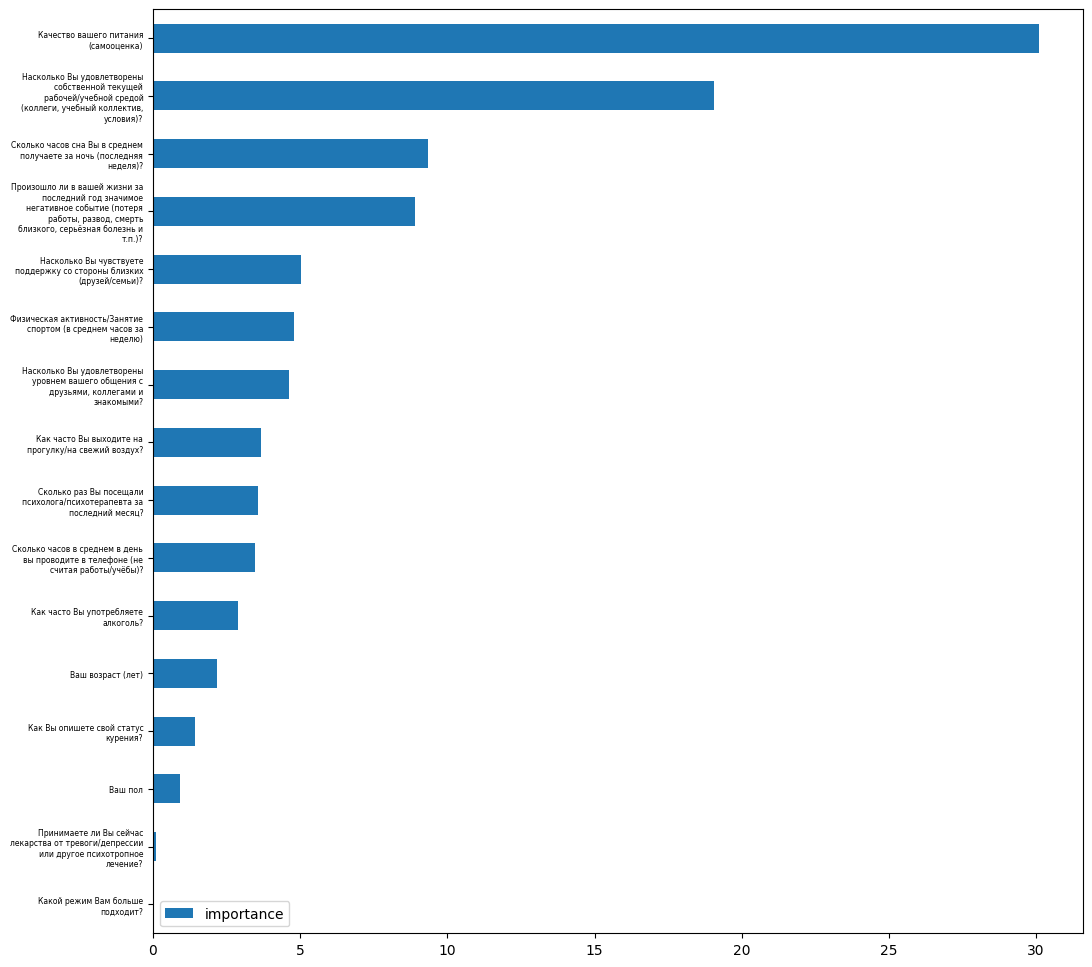

In [34]:
 my_plot=plot_feature_importance(best_model)

In [ ]:
import shap

# Инициализируем explainer для CatBoost
explainer = shap.TreeExplainer(best_model)
# Вычисляем SHAP значения
shap_values = explainer.shap_values(X_test)

plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test, max_display=15, show=False)
plt.title("SHAP Summary Plot - CatBoost")
plt.tight_layout()
plt.show()

In [ ]:
Y_predict=final_pred
resid = y_test - Y_predict

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=Y_predict, alpha=0.6)
plt.plot([0,21],[0,21], color='red', linestyle='--')
plt.xlabel('True GAD-7')
plt.ylabel('Predicted')
plt.title('True vs Predicted')
plt.show()

plt.figure(figsize=(8,4))
sns.scatterplot(x=y_test, y=resid, alpha=0.6)
plt.axhline(0, color='k', linestyle='--')
plt.xlabel('True GAD-7')
plt.ylabel('Residual (y_true - y_pred)')
plt.title('Residuals vs True')
plt.show()


# feature_cols = pd.Series(X.columns)

# # Top absolute errors
# df_eval = X_test.copy()
# df_eval['y_true'] = y_test
# df_eval['y_pred'] = Y_predict
# df_eval['abs_err'] = np.abs(df_eval['y_true'] - df_eval['y_pred'])
# top = df_eval.sort_values('abs_err', ascending=False).head(20)
# display(top[['y_true','y_pred','abs_err'] + feature_cols.tolist()][:20])

# df_to_exp=top[['y_true','y_pred','abs_err'] + feature_cols.tolist()][:20]

In [45]:
def plot_residual_analysis(y_true, y_pred):
    residuals = y_true - y_pred

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Residuals vs Predicted
    axes[0,0].scatter(y_pred, residuals, alpha=0.6)
    axes[0,0].axhline(y=0, color='r', linestyle='--')
    axes[0,0].set_xlabel('Predicted Values')
    axes[0,0].set_ylabel('Residuals')
    axes[0,0].set_title('Residuals vs Predicted')

    # Distribution of Residuals
    axes[0,1].hist(residuals, bins=20, alpha=0.7, color='green', edgecolor='black')
    axes[0,1].set_xlabel('Residuals')
    axes[0,1].set_ylabel('Frequency')
    axes[0,1].set_title('Distribution of Residuals')

    # Q-Q plot для нормальности остатков
    from scipy import stats
    stats.probplot(residuals, dist="norm", plot=axes[1,0])
    axes[1,0].set_title('Q-Q Plot of Residuals')

    # Residuals over time/index (если есть временной аспект)
    axes[1,1].plot(residuals, alpha=0.7)
    axes[1,1].axhline(y=0, color='r', linestyle='--')
    axes[1,1].set_xlabel('Observation Index')
    axes[1,1].set_ylabel('Residuals')
    axes[1,1].set_title('Residuals over Observations')

    plt.tight_layout()
    return fig

In [ ]:
plot_data=plot_residual_analysis(y_test,Y_predict)

In [53]:
# Визуализация эффекта log-преобразования
def plot_log_transformation_effect(y_data):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # До преобразования
    axes[0].hist(y_data, bins=20, alpha=0.7, color='blue', edgecolor='black')
    axes[0].set_title('Original Target Distribution')
    axes[0].set_xlabel('Target Value')
    axes[0].set_ylabel('Frequency')

    # После преобразования
    axes[1].hist(np.log1p(y_data), bins=20, alpha=0.7, color='green', edgecolor='black')
    axes[1].set_title('Log-Transformed Target Distribution')
    axes[1].set_xlabel('log(1 + Target)')
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()

In [ ]:
plot_log_transformation_effect(y_test)